# Week-1

# Linear Regression Example using tensorflow
Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.


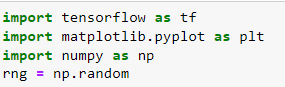

In [ ]:
#Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng= np.random

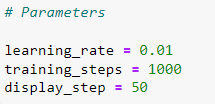

In [2]:
#Parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

#### Just run the next cell using 'Ctrl' + 'Enter'

In [3]:
# Training Data.

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])

Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = X.shape[0]

In [4]:
print(X, '\n', X.shape)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


In [5]:
print(Y, '\n', Y.shape)

[1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ] 
 (17,)


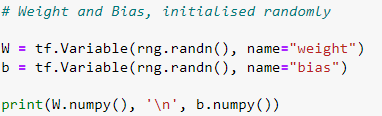

In [ ]:
#Weight and Bias, Initialisied randomly
W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name="bias")
print(W.numpy(), '\n', b.numpy())

0.72464764 
 1.1894372


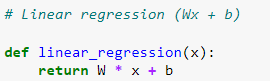

In [7]:
#Linear Regression (Wx +b )
def linear_regression(x):
    return W*x +b

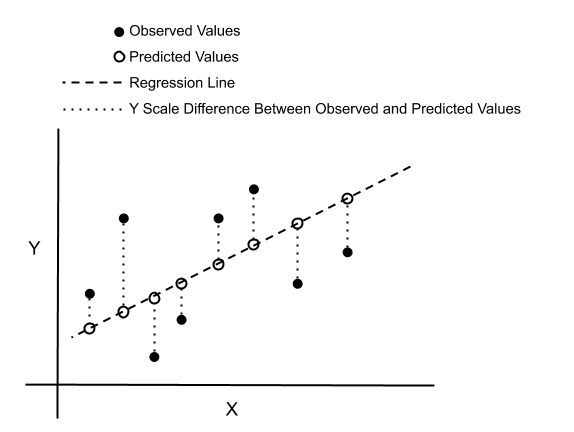

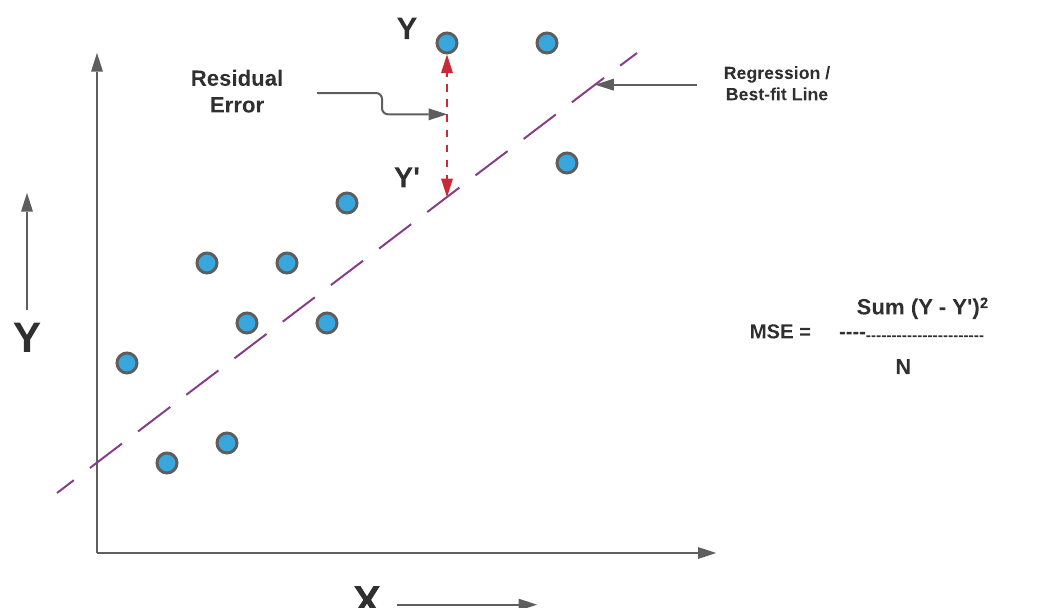

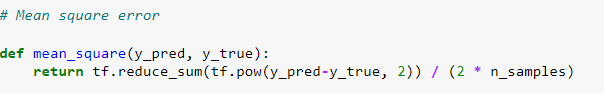

In [8]:
#Mean Square Error
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

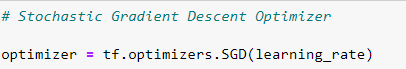

In [9]:
#Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [10]:
# Adding a question mark () after the function name lets you view the latest documentation. 
# This is a handy tool.

In [11]:
tf.optimizers.SGD?

Init signature:
tf.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD',
    **kwargs,
)
Docstring:     
Gradient descent (with momentum) optimizer.

Update rule for parameter `w` with gradient `g` when `momentum` is 0:

```python
w = w - learning_rate * g
```

Update rule when `momentum` is larger than 0:

```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```

When `nesterov=True`, this rule becomes:

```python
velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g
```

Args:
    learning_rate: A float, a
        `keras.optimizers.schedules.LearningRateSchedule` instance, or
        a callable that takes no arguments and returns the actual value to


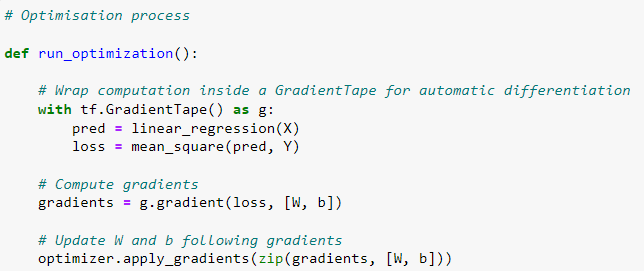

In [12]:
#Optimisation Process
def run_optimization():
    #Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        pred= linear_regression(X)
        loss = mean_square(pred, Y)
    #Compute Gradient
    gradients = g.gradient(loss, [W, b])
    #Update W and v following gradients
    optimizer.apply_gradients(zip(gradients, [W, b]))

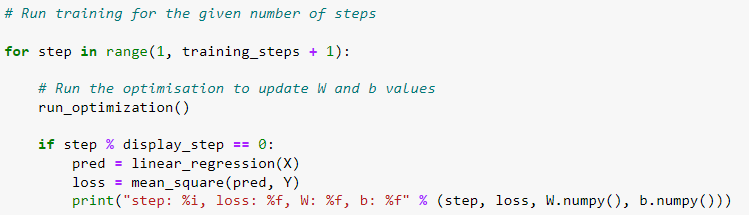

In [ ]:
loss_history = []  # To store loss values for visualization
#Run training for the given number of steps
for step in range(1, training_steps +1):
    # Run the optimisation to update W and b values
    run_optimization()
    if step % display_step ==0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        loss_history.append(loss.numpy())  # Log the loss
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.082458, W: 0.209477, b: 1.097685
step: 100, loss: 0.081826, W: 0.211961, b: 1.080075
step: 150, loss: 0.081266, W: 0.214298, b: 1.063502
step: 200, loss: 0.080770, W: 0.216498, b: 1.047905
step: 250, loss: 0.080331, W: 0.218569, b: 1.033227
step: 300, loss: 0.079941, W: 0.220517, b: 1.019414
step: 350, loss: 0.079597, W: 0.222350, b: 1.006416
step: 400, loss: 0.079292, W: 0.224076, b: 0.994183
step: 450, loss: 0.079022, W: 0.225700, b: 0.982671
step: 500, loss: 0.078782, W: 0.227228, b: 0.971837
step: 550, loss: 0.078570, W: 0.228666, b: 0.961642
step: 600, loss: 0.078382, W: 0.230019, b: 0.952047
step: 650, loss: 0.078216, W: 0.231293, b: 0.943018
step: 700, loss: 0.078069, W: 0.232491, b: 0.934520
step: 750, loss: 0.077939, W: 0.233619, b: 0.926524
step: 800, loss: 0.077823, W: 0.234681, b: 0.918998
step: 850, loss: 0.077721, W: 0.235680, b: 0.911916
step: 900, loss: 0.077630, W: 0.236620, b: 0.905251
step: 950, loss: 0.077550, W: 0.237505, b: 0.898979
step: 1000, l

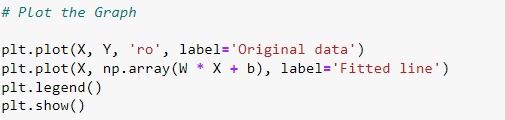

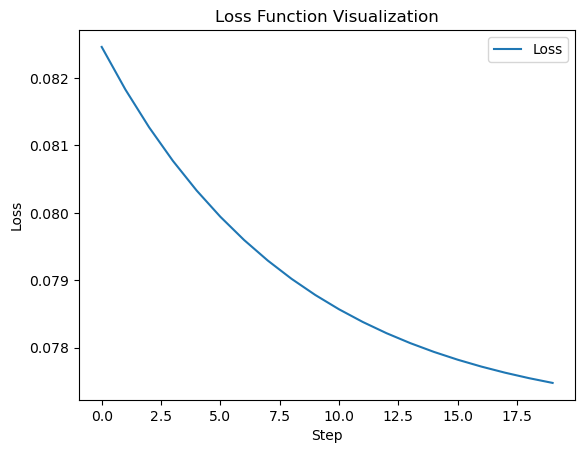

In [18]:
# Visualize the loss
plt.plot(loss_history, label='Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss Function Visualization')
plt.legend()
plt.show()

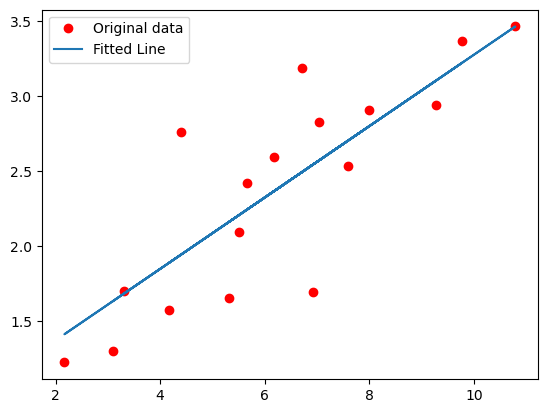

In [14]:
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W*X +b), label = 'Fitted Line')
plt.legend()
plt.show()

# Lab Logbook requirements: 
### Please make sure to document the following in your Lablogbook:

Include an image of the generated graph depicting the original data and the fitted line for linear regression. Modify the appearance of the graph by adjusting its color or size. Copy the figure and paste it directly into your logbook. Refrain from taking a snapshot; instead, right-click and copy the graph to your lab logbook. Ensure that no code or other information is added to the logbook and that only required graph is present.  

#### Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.